In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("ok")


ok


In [2]:
np.random.seed(42)

n_days = 220
dates = pd.date_range("2025-08-01", periods=n_days, freq="D")

trend = np.linspace(30, 90, n_days)
weekly = 10 * np.sin(2 * np.pi * np.arange(n_days) / 7)      # estacionalidad semanal
noise = np.random.normal(0, 4, n_days)

sales = np.maximum(0, trend + weekly + noise)

df = pd.DataFrame({"date": dates, "sales": sales})
df.head()


,date,sales
0,2025-08-01,31.986857
1,2025-08-02,37.539230
2,2025-08-03,42.887978
3,2025-08-04,41.252875
4,2025-08-05,25.820440


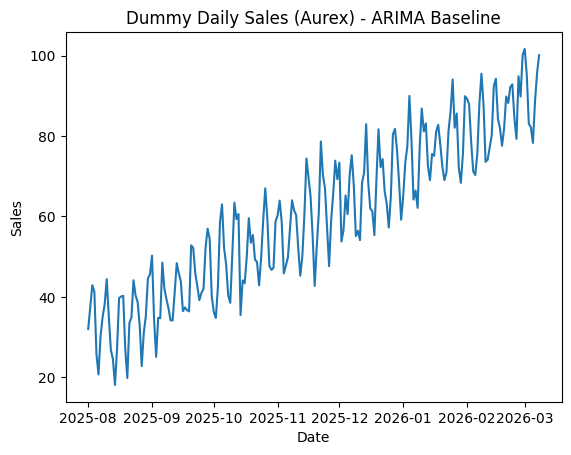

In [3]:
plt.figure()
plt.plot(df["date"], df["sales"])
plt.title("Dummy Daily Sales (Aurex) - ARIMA Baseline")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [4]:
y = df["sales"].astype(float)
split = int(len(y) * 0.8)

train = y.iloc[:split]
test  = y.iloc[split:]

len(train), len(test)


(176, 44)

In [5]:
result = adfuller(train)
print("ADF statistic:", result[0])
print("p-value:", result[1])


ADF statistic: -0.2902492206024333
p-value: 0.9268740261795767


In [6]:
# Baseline común: ARIMA(2,1,2)
order = (2, 1, 2)

model = ARIMA(train, order=order)
fit = model.fit()

print(fit.summary())


c:\Users\braya\Documents\E-COMMERCE RESEARCH\aurex-demand-forecasting\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  176
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -536.044
Date:                Wed, 04 Feb 2026   AIC                           1082.089
Time:                        00:12:42   BIC                           1097.913
Sample:                             0   HQIC                          1088.507
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1592      0.039     29.577      0.000       1.082       1.236
ar.L2         -0.8593      0.040    -21.375      0.000      -0.938      -0.780
ma.L1         -1.5959      0.062    -25.882      0.0

In [7]:
forecast = fit.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

mae, rmse


(10.373046483846975, np.float64(12.481282113592625))

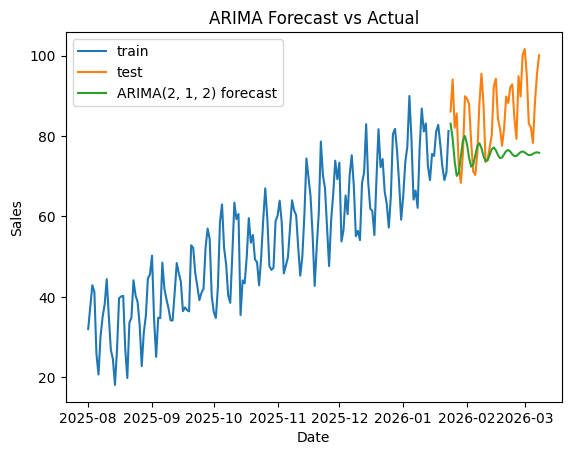

In [8]:
plt.figure()
plt.plot(df["date"].iloc[:split], train, label="train")
plt.plot(df["date"].iloc[split:], test, label="test")
plt.plot(df["date"].iloc[split:], forecast, label=f"ARIMA{order} forecast")
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [9]:
results = pd.DataFrame({
    "date": df["date"].iloc[split:].values,
    "y_true": test.values,
    "y_pred": np.array(forecast)
})
results.head()


,date,y_true,y_pred
0,2026-01-24,86.089500,83.053529
1,2026-01-25,94.056566,79.400540
2,2026-01-26,82.047333,73.619722
3,2026-01-27,85.582935,70.057548
4,2026-01-28,72.068459,70.895559


Libraries loaded ✅


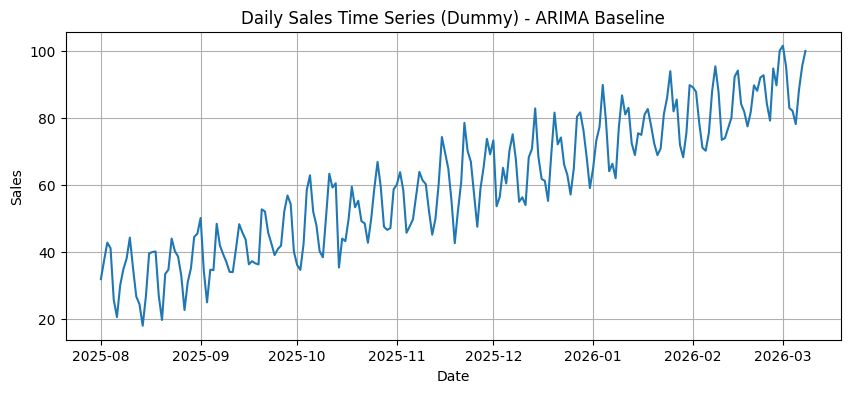

Train size: 176
Test size : 44
ADF statistic: -0.2902492206024333
p-value: 0.9268740261795767


c:\Users\braya\Documents\E-COMMERCE RESEARCH\aurex-demand-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\braya\Documents\E-COMMERCE RESEARCH\aurex-demand-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\braya\Documents\E-COMMERCE RESEARCH\aurex-demand-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\braya\Documents\E-COMMERCE RESEARCH\aurex-demand-forecasting\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
 

ARIMA model trained successfully ✅
ARIMA Metrics
Order: ARIMA(2, 1, 2)
MAE  : 10.37
RMSE : 12.48
MAPE : 11.54%


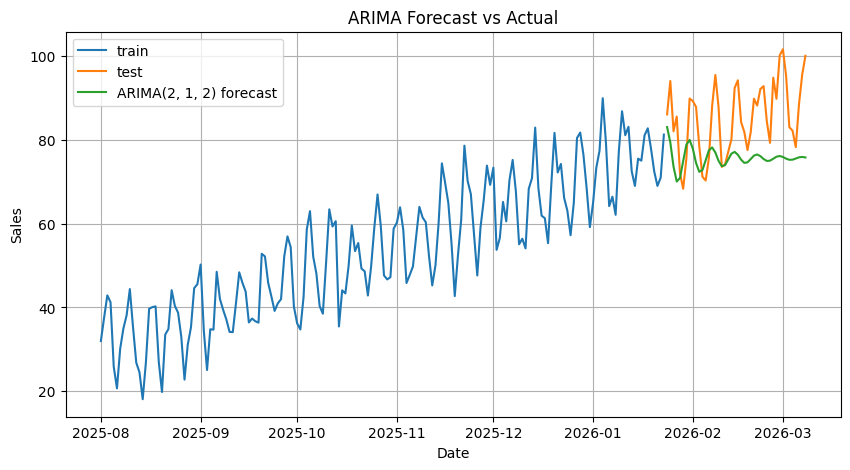

,date,y_true,y_pred
0,2026-01-24,86.089500,83.053529
1,2026-01-25,94.056566,79.400540
2,2026-01-26,82.047333,73.619722
3,2026-01-27,85.582935,70.057548
4,2026-01-28,72.068459,70.895559


In [5]:
# =========================
# 1) Setup + Libraries
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Libraries loaded ✅")

# =========================
# 2) Dummy Dataset (Aurex style)
# =========================
np.random.seed(42)

n_days = 220
dates = pd.date_range("2025-08-01", periods=n_days, freq="D")

trend = np.linspace(30, 90, n_days)
weekly = 10 * np.sin(2 * np.pi * np.arange(n_days) / 7)      # weekly seasonality
noise = np.random.normal(0, 4, n_days)

sales = np.maximum(0, trend + weekly + noise)

df = pd.DataFrame({"date": dates, "sales": sales})
df.head()

# =========================
# 3) Plot Time Series (Screenshot candidate)
# =========================
plt.figure(figsize=(10, 4))
plt.plot(df["date"], df["sales"])
plt.title("Daily Sales Time Series (Dummy) - ARIMA Baseline")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# =========================
# 4) Temporal Split 80/20  (train/test creation)
# =========================
# Option A: keep as Series with date index (recommended)
y = pd.Series(df["sales"].values, index=df["date"]).astype(float)

split = int(len(y) * 0.8)
train = y.iloc[:split]
test  = y.iloc[split:]

print("Train size:", len(train))
print("Test size :", len(test))

# =========================
# 5) ADF Stationarity Test (optional to show, not necessary for screenshots)
# =========================
adf_stat, p_value, *_ = adfuller(train)
print("ADF statistic:", adf_stat)
print("p-value:", p_value)

# =========================
# 6) Train ARIMA
# =========================
order = (2, 1, 2)   # baseline
model = ARIMA(train, order=order)
fit = model.fit()

print("ARIMA model trained successfully ✅")

# =========================
# 7) Forecast + Metrics (Screenshot candidate)
# =========================
forecast = fit.forecast(steps=len(test))

mae  = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / np.maximum(test, 1e-8))) * 100

print("ARIMA Metrics")
print(f"Order: ARIMA{order}")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

# =========================
# 8) Forecast vs Actual Plot (Screenshot candidate - MOST IMPORTANT)
# =========================
plt.figure(figsize=(10, 5))
plt.plot(train.index, train.values, label="train")
plt.plot(test.index, test.values, label="test")
plt.plot(test.index, forecast.values if hasattr(forecast, "values") else forecast, label=f"ARIMA{order} forecast")

plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# =========================
# 9) Save results table (optional)
# =========================
results_arima = pd.DataFrame({
    "date": test.index,
    "y_true": test.values,
    "y_pred": forecast.values if hasattr(forecast, "values") else forecast
})

results_arima.head()


